<h1 style='color: green; font-size: 36px; font-weight: bold;'>Exploratory Data Analysis: Brasilian houses to rent</h1>

## Importando Bibliotecas

In [1]:
# Import das bibliotecas e setting de configurações 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.ensemble import IsolationForest


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 400)

%matplotlib inline
plt.rc('figure', figsize = (14, 6))



## Dataset

Fonte: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

### Descrição:

O dataset contem 10692 casas para alugar (entries) com 13 classes diferentes (columns).

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>0 city</b> - Cidade onde o imóvel está localizado</li>
    <li><b>1 area</b> - area do imóvel (m²)</li>
    <li><b>2 rooms</b> - número de quartos</li>
    <li><b>3 bathroom</b> - quantidade de banheiros</li>
    <li><b>4 parking spaces</b> - número de vagas de garagem</li>
    <li><b>5 floor</b> - andar do apartamento</li>
    <li><b>6 animal</b> - aceita animais (acept = Sim; not acept = Não)</li>
    <li><b>7 furniture</b> - mobiliada (furnished = Sim; not furnished = Não)</li>
    <li><b>8 hoa (R$)</b> - Valor do condominio (R$)</li>
    <li><b>9 rent amount (R$)</b> - valor do aluguel (R$)</li>
    <li><b>10  property tax (R$)</b> - IPTU (R$)</li>
    <li><b>11  fire insurance (R$)</b> - Seguro de incendio (R$)</li>
    <li><b>12  total (R$)</b> - Valor total do aluguel (R$)</li>

### Leitura dos dados

In [2]:
dataset = pd.read_csv('houses_to_rent_v2.csv', sep=',')

In [3]:
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


### Limpeza dos dados

Renomiando as colunas para retirar o "(R$)"

In [4]:
dataset.rename({'hoa (R$)':'hoa', 'rent amount (R$)': 'rent amount', 
                'property tax (R$)': 'property tax', 
                'fire insurance (R$)':'fire insurance', 'total (R$)': 'total'}, 
                axis=1, inplace=True)

In [5]:
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
print(f'As dimensões do dataframe:\nEntradas: {dataset.shape[0]}\nAtributos: {dataset.shape[1]}')

As dimensões do dataframe:
Entradas: 10692
Atributos: 13


## Data exploration

### Verificação de dados faltantes

In [7]:
# Visualização do resumo de informações sobre o DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent amount     10692 non-null  int64 
 10  property tax    10692 non-null  int64 
 11  fire insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Analizando as informações do DataFrame é possivel visualizar que não há dados faltantes (NaN) em nenhuma das colunas, já que o número de entradas é igual ao número de dados que não são NaN em cada coluna. 

Além disso é possivel visualizar os tipos dos dados presentes em cada coluna. As colunas city, animal e furniture são do tipo object, no qual seus dados são representados por 'Strings'. 

Além disso, a coluna floor também possui o tipo de dado como object. Logo vamos realizar uma investigação ao seu respeito.


### Substituindo os valores das colunas animal and furniture por valores binários

Alterando os valores das colunas para valores binários. Na coluna animal, 0 = acept e 1 = not acept. Já na coluna furniture, 0 = furnished e 1 = not furnished.

In [8]:
dataset.replace({'acept': 0, 'not acept': 1}, inplace=True)     # alterando a coluna animal
dataset.replace({'furnished': 0, 'not furnished': 1}, inplace=True)     # alterando a coluna furniture
dataset.head(10)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,0,1,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,1,1,0,800,25,11,836
5,São Paulo,376,3,3,7,-,0,1,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,0,1,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,0,1,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,0,0,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,0,0,590,2300,35,30,2955


### Investigando os dados da coluna 'floor'

Verificando os valores unicos da coluna 'floor', obtemos:

In [9]:
dataset['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

Fazendo uma pesquisa mais profunda sobre os dados, foi descoberto que o autor da base de dados afirmou que a ocorrencia '-' na coluna de andares (floor) são imoveis que não possuiem andar especifico, como casas. Logo, uma possível solução é substituir esses dados pelo valor 0, ou seja, o andar terrio. Para caso seja necessário análises desse tipo de imovel posterioremente, vamos separar esse conjunto de dados e salvalo em um novo arquivo csv antes de realiazar a alteração.

In [10]:
dados_casas = dataset.query('floor == "-"')
dados_casas.to_csv('imoveis_do_tipo_casas.csv', sep=',', index=False)

Número de ocorrencias em que o andar (floor) é representado por '-'

In [11]:
dataset.query('floor == "-"')['floor'].count()

2461

Trasformaremos as entradas representadas por '-' na coluna andar (floor) por 0

In [12]:
dataset['floor'] = dataset['floor'].replace('-', 0)


Através do metodo astype vamos transformar os dados da coluna em dados do tipo inteiro

In [13]:
dataset['floor'] = dataset['floor'].astype(np.int64) # Foi utilizado o tipo np.int64, pois quando se utilizou apenas o tipo 'int' o dtype da coluna assumia um valor de int32 

Conferindo o novo tipo da coluna floor

In [14]:
dataset['floor'].dtypes

dtype('int64')

### Cidades

O número de imoveis disponivel para alugar em cada cidade

In [15]:
numero_imovel_por_cidade = dataset.groupby('city')['city'].count().to_frame()
numero_imovel_por_cidade.rename({'city':'Imoveis'}, axis=1, inplace=True)
numero_imovel_por_cidade


,Imoveis
city,
Belo Horizonte,1258
Campinas,853
Porto Alegre,1193
Rio de Janeiro,1501
São Paulo,5887


Criando uma tabela das cidades e atribuido um Id para cada uma delas

In [16]:
# Cidades que possuiem um inmovel para alugar
cidades = pd.DataFrame(dataset.city.drop_duplicates())
cidades.index = range(cidades.shape[0])
cidades.columns.name = 'Id'
cidades

Id,city
0,São Paulo
1,Porto Alegre
2,Rio de Janeiro
3,Campinas
4,Belo Horizonte


### Análise Prévia das Características Descritivas 

In [17]:
# Visualização das características descritivas das variáveis
dataset[['area', 'rooms','parking spaces', 'floor','hoa','rent amount','property tax','fire insurance','total']].describe().round(2)

,area,rooms,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,1.61,5.07,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.59,6.07,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,0.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,0.00,1.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,1.00,3.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,2.00,8.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,12.00,301.00,1117000.00,45000.00,313700.00,677.00,1120000.00


Através de uma visualiização previa das características descritivas é possível visualizar algumas informações estranhas e que devem ser analizadas cuidadosamente, como por exemplo, os máximos valores de area (46335.00 m²), de hoa (R$ 1117000.00), de property tax (R$ 313700.00), e de floor (301).

### Identificando Outliers

#### Analizando a 'area'

Text(0.5, 0, 'Área (m²)')

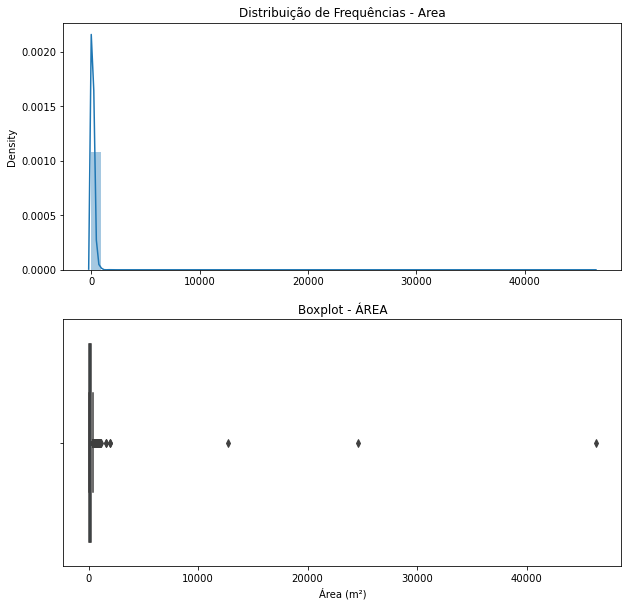

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Distribuição de Frequências - Area')
sns.distplot(dataset.area, axlabel=False)

plt.subplot(2,1,2)
plt.title('Boxplot - ÁREA')
sns.boxplot( x = 'area', data = dataset, orient = 'h')
plt.xlabel('Área (m²)', fontsize=10)


#### Analizando a 'floor'

Text(0.5, 0, 'Número de andares')

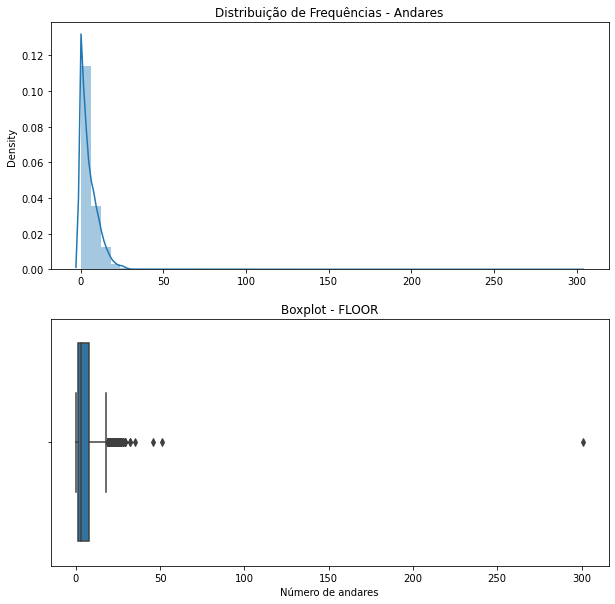

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Distribuição de Frequências - Andares')
sns.distplot(dataset.floor, axlabel=False)

plt.subplot(2,1,2)
plt.title('Boxplot - FLOOR')
sns.boxplot( x = 'floor', data = dataset, orient = 'h')
plt.xlabel('Número de andares', fontsize=10)

#### Analizando a 'hoa'

Text(0.5, 0, 'Valor do condominio (R$)')

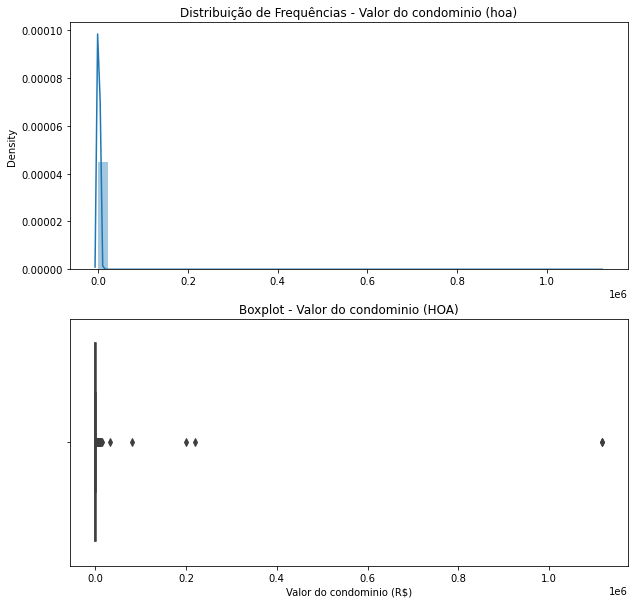

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Distribuição de Frequências - Valor do condominio (hoa)')
sns.distplot(dataset.hoa, axlabel=False)

plt.subplot(2,1,2)
plt.title('Boxplot - Valor do condominio (HOA)')
sns.boxplot( x = 'hoa', data = dataset, orient = 'h')
plt.xlabel('Valor do condominio (R$)', fontsize=10)

#### Analizando a 'property tax'	

Text(0.5, 0, 'Valor do IPTU (R$)')

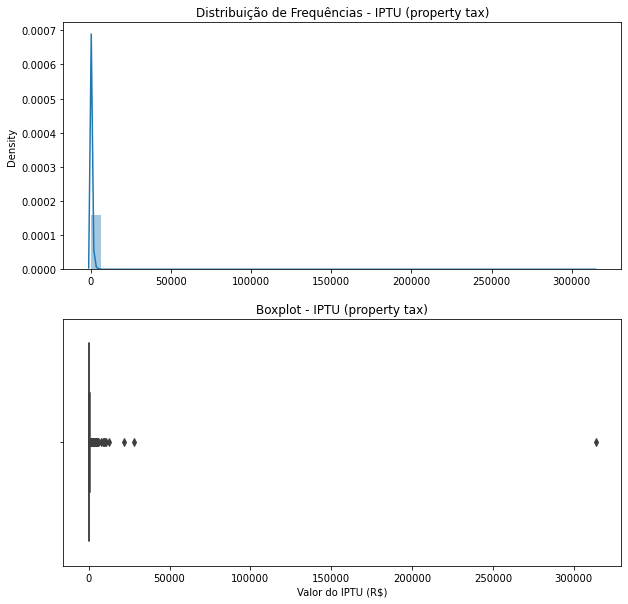

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Distribuição de Frequências - IPTU (property tax)')
sns.distplot(dataset['property tax'], axlabel=False)

plt.subplot(2,1,2)
plt.title('Boxplot - IPTU (property tax)')
sns.boxplot( x ='property tax', data = dataset, orient = 'h')
plt.xlabel('Valor do IPTU (R$)', fontsize=10)

Há mais imóveis com taxas e valores mais baixos, aproximadamente com o mesmo valor, seguindo um mesmo padrão do que imóveis de luxo, que compõem a minoria e custam muito mais caro. O andar disponivel dos imoveis segue o mesmo padrão dos valores, onde a maioria dos prédios possuiem poucos andares, e uma minoria são compostos de muitos andares. E é basicamente isso que o gráfico de distribuição de frequências e boxplots nos mostra. 

No momento, nos gráficos de distribuição de frequências, nitidamente, temos uma assimetria à direita nos três casos. Os boxplots também estão achatados, praticamente todo jogado para o lado esquerdo. Em função disso, é dado o nome de assimetria à direita, pois a linha que se estende da queda da curva fica à direita, criando uma assimetria no lado com menos valores.

Dados dessa natureza podem gerar problemas para estimarmos regressão, porém possibilitam a transformação para que se aproximem de uma forma simétrica, que permite estimar um modelo de regressão. E, então, para pegar as previsões, retornamos essas transformações.

### Aplicando a transformação logarítmica aos dados das colunas "area", "floor" e "hoa"

Andes de aplicar a transformação logarítmica é possível enxergar que as colunas "floor" e "hoa" assumem valores igual a zero. Se aplicada a transformação estes valores vão assumir valores “-inf” e serão descartados, logo, uma solução para este problema é somar uma unidade a todos os valores destas colunas. Assim, não alteraremos a variação dessa variável. Só passaremos ao patamar superior. E, quando passarmos o log, os valores que aparecem como 0 na tabela, serão igual a 1, então ao aplicar a transformação assumirão um valor igual 0. Foi criado um DataFrame temporário ("temp_df") para criação de novas colunas e seleção dos itens que será realizada no DataFrame dos dados ("dataset").

In [22]:
temp_df = dataset[:]
temp_df['log_area'] = np.log(dataset['area'])
temp_df['log_floor'] = np.log(dataset['floor'] + 1)
temp_df['log_hoa'] = np.log(dataset['hoa'] + 1)
temp_df['log_property_tax'] = np.log(dataset['property tax'] + 1)


In [23]:
temp_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,log_area,log_floor,log_hoa,log_property_tax
0,São Paulo,70,2,1,1,7,0,0,2065,3300,211,42,5618,4.248495,2.079442,7.633370,5.356586
1,São Paulo,320,4,4,0,20,0,1,1200,4960,1750,63,7973,5.768321,3.044522,7.090910,7.467942
2,Porto Alegre,80,1,1,1,6,0,1,1000,2800,0,41,3841,4.382027,1.945910,6.908755,0.000000
3,Porto Alegre,51,2,1,0,2,0,1,270,1112,22,17,1421,3.931826,1.098612,5.602119,3.135494
4,São Paulo,25,1,1,0,1,1,1,0,800,25,11,836,3.218876,0.693147,0.000000,3.258097


Distribuição de frequências das variáveis transformada

<AxesSubplot:title={'center':'Distribuição de Frequências - Area'}, xlabel='Metros²', ylabel='Density'>

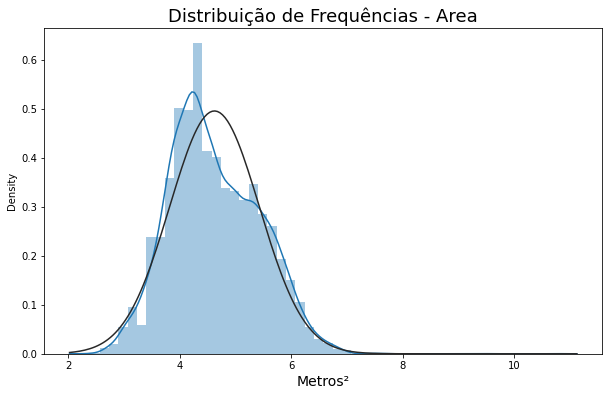

In [24]:
ax = sns.distplot(temp_df.log_area, fit=scipy.stats.norm)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribuição de Frequências - Area', fontsize=18)
ax.set_xlabel('Metros²', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Andares'}, xlabel='Número de andares', ylabel='Density'>

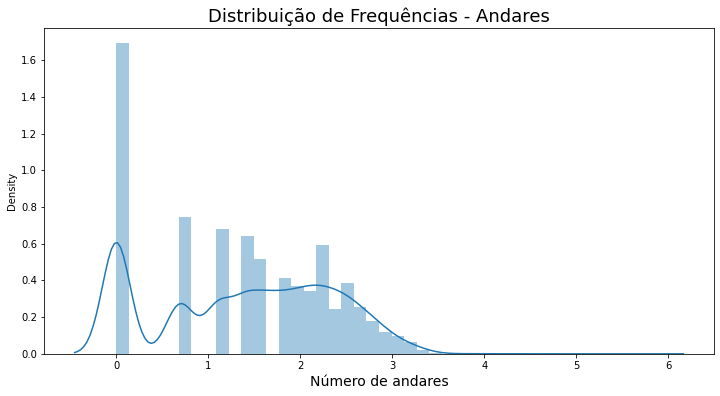

In [25]:
ax = sns.distplot(temp_df.log_floor)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Valor do condominio (hoa)'}, xlabel='Reais (R$)', ylabel='Density'>

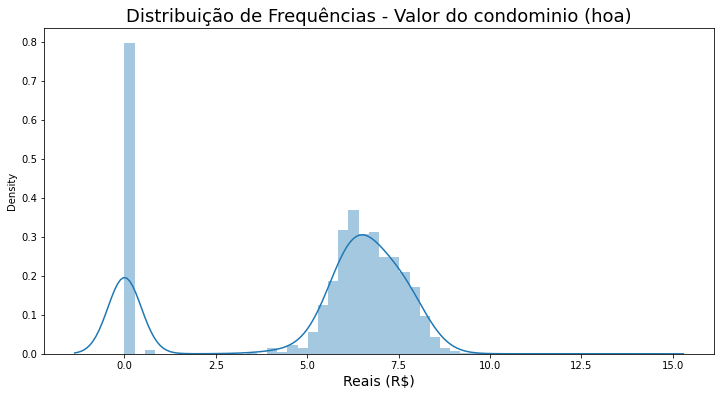

In [26]:
ax = sns.distplot(temp_df.log_hoa)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Valor do condominio (hoa)', fontsize=18)
ax.set_xlabel('Reais (R$)', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - IPTU (property tax)'}, xlabel='Reais (R$)', ylabel='Density'>

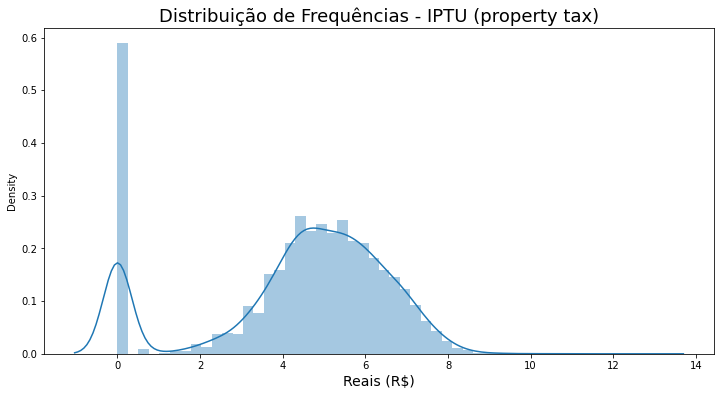

In [27]:
ax = sns.distplot(temp_df.log_property_tax)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - IPTU (property tax)', fontsize=18)
ax.set_xlabel('Reais (R$)', fontsize=14)
ax

Através das distribuições de frequência de cada coluna estudada é possível perceber que apenas os dados de área (coluna “area”) se aproximam de uma distribuição normal. Iremos aplicar o método Z-score para os dados da área. Para as colunas de “floor” e “hoa” que não se aproximaram de uma distribuição normal vamos aplicar o método Isolation Forests.

### Implementando o método Z-score para coluna "area"

A Z-score de uma observação é uma métrica que indica quantos desvios padrão um ponto de dados está da média da amostra, assumindo uma distribuição gaussiana. Calculando o z-score para cada amostra no conjunto de dados. 

In [28]:
media = temp_df['log_area'].mean()
desvio_padrao = temp_df['log_area'].std()
temp_df['zscore'] = (temp_df['log_area'] - media) / desvio_padrao

temp_df.head(5)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,log_area,log_floor,log_hoa,log_property_tax,zscore
0,São Paulo,70,2,1,1,7,0,0,2065,3300,211,42,5618,4.248495,2.079442,7.633370,5.356586,-0.462526
1,São Paulo,320,4,4,0,20,0,1,1200,4960,1750,63,7973,5.768321,3.044522,7.090910,7.467942,1.428222
2,Porto Alegre,80,1,1,1,6,0,1,1000,2800,0,41,3841,4.382027,1.945910,6.908755,0.000000,-0.296406
3,Porto Alegre,51,2,1,0,2,0,1,270,1112,22,17,1421,3.931826,1.098612,5.602119,3.135494,-0.856481
4,São Paulo,25,1,1,0,1,1,1,0,800,25,11,836,3.218876,0.693147,0.000000,3.258097,-1.743430


Analisando visualmente os dados que possuem Z-Score maior que 3 percebemos que não é algo anormal um imovel com 2000 m², logo, vamos escolher um valor superior para o Z-Score que estes casos.

In [29]:
temp_df.query('zscore > 3')

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,log_area,log_floor,log_hoa,log_property_tax,zscore
654,São Paulo,1600,6,6,6,0,0,0,0,7600,1834,115,9549,7.377759,0.000000,0.000000,7.514800,3.430452
2397,Belo Horizonte,46335,4,8,5,11,0,0,960,8500,646,114,10220,10.743653,2.484907,6.867974,6.472346,7.617811
4813,São Paulo,1600,4,5,12,0,0,1,1,6900,5000,104,12010,7.377759,0.000000,0.693147,8.517393,3.430452
5129,Belo Horizonte,2000,4,2,3,0,0,1,0,4956,200,82,5238,7.600902,0.000000,0.000000,5.303305,3.708055
5915,São Paulo,24606,5,4,4,12,0,1,2254,8100,7859,103,18320,10.110746,2.564949,7.720905,8.969542,6.830439
8790,Belo Horizonte,2000,3,3,2,2,0,0,3000,5000,200,67,8267,7.600902,1.098612,8.006701,5.303305,3.708055
9241,Campinas,12732,3,2,0,3,0,1,700,1600,96,21,2417,9.451874,1.386294,6.552508,4.574711,6.010766


Definido um limite de 'regra de polegar' em 3.8 desvios padrão para remoção dos dados, vamos então remover os dados supeior a este valor no dataset:

In [30]:
selecao = temp_df['zscore'] < 3.8
dataset = dataset[selecao]

### Utilizando o Isolation Forest para a coluna 'floor'

Selecinando 70% do dataset para treinar o modelo:

In [31]:
X_floor = dataset[['floor']].sample(frac=0.7)

Aplicando o IsolationForest e realizado o treinamento:

In [32]:
floor_model = IsolationForest(contamination=0.001).fit(X_floor)

Realizando a predição para todo o conjunto de dados:

In [33]:
yhat_floor = floor_model.predict(dataset[['floor']])

Apos a realização da predição é retornado um "numpy.ndarray" com valores de 1 ou -1 para cada dado. O valor -1 indica que o dado é um outlier, enquanto o valor 1 indica um dado normal. Logo, iremos realizar a seleção dos dados que não são outliers:

In [34]:
mask_floor = yhat_floor != -1
dataset = dataset[mask_floor]

<AxesSubplot:title={'center':'Boxplot - FLOOR'}, xlabel='Número de andares'>

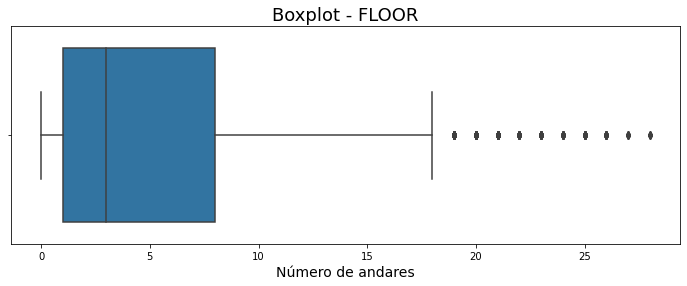

In [35]:
ax = sns.boxplot( x = 'floor', data = dataset, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Boxplot - FLOOR', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax

### Utilizando o Isolation Forest para a coluna 'hoa'

Será realizado o mesmo procedimento para criação e treinamento do modelo de IsolationForest para os dados de coluna 'hoa' para 70% dos dados:

In [36]:
X_hoa = dataset[['hoa']].sample(frac=0.7)

Criando e treinando o modelo:

In [37]:
hoa_model = IsolationForest(contamination=0.001).fit(X_hoa)

Realizando a predição dos dados:

In [38]:
yhat_hoa = hoa_model.predict(dataset[['hoa']])

Iremos realizar a seleção dos dados que não são outliers:

In [39]:
mask_hoa = yhat_hoa != -1
dataset = dataset[mask_hoa]

<AxesSubplot:title={'center':'Boxplot - Valor do condominio (hoa)'}, xlabel='Valor do condominio (R$)'>

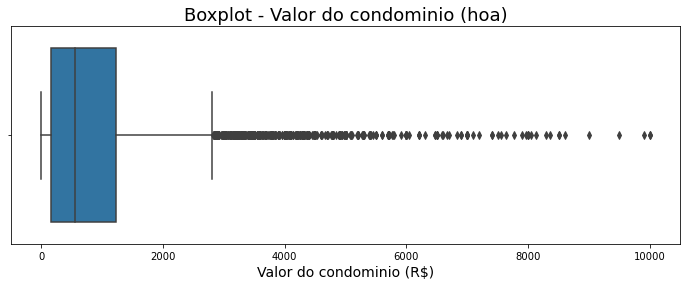

In [40]:
ax = sns.boxplot( x = 'hoa', data = dataset, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Boxplot - Valor do condominio (hoa)', fontsize=18)
ax.set_xlabel('Valor do condominio (R$)', fontsize=14)
ax

### Utilizando o Isolation Forest para a coluna 'property tax'

Será realizado o mesmo procedimento para criação e treinamento do modelo de IsolationForest para os dados de coluna 'hoa' para 70% dos dados:

In [41]:
X_hoa = dataset[['property tax']].sample(frac=0.7)

Criando e treinando o modelo e treinando o modelo:

In [42]:
hoa_model = IsolationForest(contamination=0.001).fit(X_hoa)

Realizando a predição dos dados e removendo os outliers:

In [43]:
yhat_hoa = hoa_model.predict(dataset[['property tax']])

mask_hoa = yhat_hoa != -1
dataset = dataset[mask_hoa]

<AxesSubplot:title={'center':'Boxplot - IPTU (property tax)'}, xlabel='Valor do IPTU (R$)'>

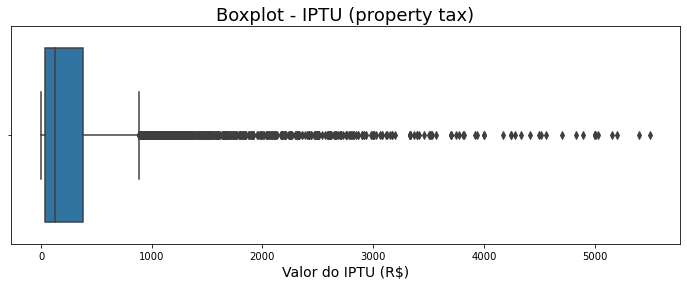

In [44]:
ax = sns.boxplot( x = 'property tax', data = dataset, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Boxplot - IPTU (property tax)', fontsize=18)
ax.set_xlabel('Valor do IPTU (R$)', fontsize=14)
ax

## Salvando as alterações em um novo arquivo csv

In [45]:
dataset.to_csv('houses_to_rent_analisado.csv', sep=',', index=False)